## Contents
<a href='#assess' style='text-decoration:none;font-size:15px'>Assess</a>
<br/>
<a href='#clean' style='text-decoration:none;font-size:15px'>Clean</a>
<br/>
<a href='#sav' style='text-decoration:none;font-size:15px'>Storing, Analyzing and Visualizing Data</a>

## Gather <a name='gather'/>
<a href='#twitter_archive' style='text-decoration:none;font-size:15px'>Twitter Archive Enhanced</a>
<br/>
<a href='#image_predictions' style='text-decoration:none;font-size:15px'>Image Predictions</a>
<br/>
<a href='#twitter_api' style='text-decoration:none;font-size:15px'>Twitter Api</a>


In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
# WeRateDogs Twitter archive file

In [4]:
df_enhanced_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [5]:
# tweet image predictions (image_preductions.tsv)

In [6]:
import requests
import os

In [6]:
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [16]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
df_image_predict = pd.read_csv('./data/image-predictions.tsv', sep='\t')

In [45]:
# Twitter Api Archive

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

- Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
- These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

- NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
- df_enhanced_archive is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
- change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
- NOTE TO REVIEWER: this student had mobile verification issues so the following
- Twitter API code was sent to this student from a Udacity instructor
- Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_enhanced_archive.tweet_id.values
len(tweet_ids)

- Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

- Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:

- This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2]:
# Read tweet_json.txt file into a DataFrame for tweet ID, retweet count, and favorite count

In [8]:
tweets = []
for line in open('./data/tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [9]:
# load tweets data into Dataframe

In [10]:
df_tweets = pd.DataFrame(tweets, columns=['id', 'retweeted', 'retweet_count', 'favorited', 'favorite_count'])
df_tweets.rename(columns={'id':'tweet_id'},inplace=True)

#### Twitter Archive Enhanced <a name='twitter_archive'/>
<a href='#gather' style='text-decoration:none;font-size:14px'>Go to Gather</a>

In [11]:
df_enhanced_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_enhanced_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
df_enhanced_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_enhanced_archive[df_enhanced_archive.in_reply_to_user_id.isna()].count()[0]/2356

0.96689303904923596

In [15]:
df_enhanced_archive[df_enhanced_archive.retweeted_status_id.isna()].count()[0]/2356


0.92317487266553477

In [16]:
df_enhanced_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_enhanced_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
df_enhanced_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Bailey        7
Daisy         7
an            7
Buddy         7
Dave          6
Stanley       6
Koda          6
Rusty         6
Leo           6
Jack          6
Scout         6
Milo          6
Oscar         6
Jax           6
Bella         6
Sunny         5
           ... 
Coopson       1
Siba          1
Obie          1
Mollie        1
Chloe         1
Timber        1
Jed           1
Mosby         1
Pherb         1
Fynn          1
Angel         1
Bobb          1
Lili          1
by            1
Jazzy         1
Rose          1
General       1
Lassie        1
Meatball      1
Schnozz       1
Aiden         1
Crimson       1
Kenzie        1
Stewie        1
Brutus        1
Dale          1
Doobert       1
Strider       1
Bruiser       1
Buckley       1
Name: name, Length: 957,

In [18]:
df_enhanced_archive[df_enhanced_archive.name.str.islower()]['name'].sample(15)

1785             a
1382             a
2125             a
1193             a
2001         light
2255             a
2327             a
542     incredibly
22            such
2037           the
193          quite
1853             a
2030         space
801              a
2353             a
Name: name, dtype: object

In [19]:
set(df_enhanced_archive.doggo)

{'None', 'doggo'}

In [20]:
set(df_enhanced_archive.floofer)

{'None', 'floofer'}

In [21]:
set(df_enhanced_archive.pupper)

{'None', 'pupper'}

In [22]:
set(df_enhanced_archive.puppo)

{'None', 'puppo'}

In [24]:
df_enhanced_archive[df_enhanced_archive.text.str.contains('Please only send in dogs')].count()[0]

13

In [42]:
searchExpr = '\s[A-Za-z]{1}(\*ckin)[g]?\s'
df_enhanced_archive.text.str.extract(searchExpr, expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,*ckin
6,NaN
7,NaN
8,NaN
9,NaN


In [43]:
df_enhanced_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Image predictions file <a name='image_predictions'/>
<a href='#twitter_archive' style='text-decoration:none;font-size:14px'>Go to Twitter Archive Enhanced</a>

In [25]:
df_image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
df_image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
# incorrect prediction
df_image_predict[df_image_predict['p1']=='bakery']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1551,793135492858580992,https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg,1,bakery,0.737041,False,saltshaker,0.052396,False,teddy,0.046593,False


In [30]:
df_enhanced_archive.query('tweet_id==793135492858580992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
647,793135492858580992,NaN,NaN,2016-10-31 17:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your favorite squad is looking extra h*ckin sp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793135492...,13,10,None,None,None,None,None


In [31]:
df_enhanced_archive.query('tweet_id==747885874273214464')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None


#### Twiter Api file <a name='twitter_api'/>
<a href='#image_predictions' style='text-decoration:none;font-size:14px'>Go to Image Predictions</a>

In [32]:
df_tweets.head()

,tweet_id,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,False,8853,False,39467
1,892177421306343426,False,6514,False,33819
2,891815181378084864,False,4328,False,25461
3,891689557279858688,False,8964,False,42908
4,891327558926688256,False,9774,False,41048


In [33]:
df_tweets.tail()

,tweet_id,retweeted,retweet_count,favorited,favorite_count
2349,666049248165822465,False,41,False,111
2350,666044226329800704,False,147,False,311
2351,666033412701032449,False,47,False,128
2352,666029285002620928,False,48,False,132
2353,666020888022790149,False,532,False,2535


In [34]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweeted         2354 non-null bool
retweet_count     2354 non-null int64
favorited         2354 non-null bool
favorite_count    2354 non-null int64
dtypes: bool(2), int64(3)
memory usage: 59.8 KB


## Assess <a name='assess'/>
<a href='#gather' style='text-decoration:none;font-size:14px'>Go to Gather</a>
<br/>
<a href='#clean' style='text-decoration:none;font-size:14px'>Go to Clean</a>

#### Quality

##### `twitter archive enhanced` table

- name column has incorrect lowercase values i.e. 'a', 'actually', 'not'
- name column has 'None' value for 745 records
- Missing information for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id columns
- Incorrect datatype for retweeted_status_timestamp, timestamp
- Records with "Please only send in dogs" in text
- text on one record has profanity, "h*ckin"
- rating numerators above 100 i.e. 1776, 960, 666
- rating demoninators not equal to 10

#### Tidiness

##### `twitter archive enhanced` table

- Values for "dog stage" are appearing as columns, doggo, floofer, pupper, puppo

#### `image predictions file` table

- columns (p1, p2, p3) should appear in single column
- columns (p1_conf, p2_conf, p3_conf) should appear in single column
- columns (p1_dog, p2_dog, p3_dog) should appear in single column


## Clean <a name='clean'/>
<a href='#assess' style='text-decoration:none;font-size:14px'>Go to Assess</a>

In [44]:
df_enhanced_archive_clean = df_enhanced_archive.copy()
df_image_predict_clean = df_image_predict.copy()
df_tweets_clean = df_tweets.copy()

## Tidiness <a name='tidiness'/>
<a href='#quality' style='text-decoration:none;font-size:14px'>Go to Quality</a>

##### `twitter archive enhanced` table

##### Values for "dog stage" are appearing as columns, doggo, floofer, pupper, puppo

#### Define

- Remove "None" values from doggo, floofer, pupper, puppo columns
- Melt *doggo, floofer, pupper, puppo* colums to a *dog_stage* column

#### Code

In [45]:
df_enhanced_archive_clean.doggo.replace('None','',inplace=True)
df_enhanced_archive_clean.floofer.replace('None','',inplace=True)
df_enhanced_archive_clean.pupper.replace('None','',inplace=True)
df_enhanced_archive_clean.puppo.replace('None','',inplace=True)

In [46]:
df_enhanced_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
df_enhanced_archive_clean = pd.melt(df_enhanced_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], var_name='dog_stage')

In [48]:
df_enhanced_archive_clean.drop(['value'], axis = 1, inplace=True)

#### Test

In [49]:
df_enhanced_archive_clean.dog_stage.value_counts()

puppo      2356
doggo      2356
floofer    2356
pupper     2356
Name: dog_stage, dtype: int64

In [50]:
df_enhanced_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo


In [51]:
df_enhanced_archive_clean.sample(25)[['tweet_id', 'dog_stage']].sort_values('tweet_id')

,tweet_id,dog_stage
4535,669006782128353280,floofer
4449,670780561024270336,floofer
4286,674038233588723717,floofer
1926,674053186244734976,doggo
4194,675898130735476737,floofer
1794,677328882937298944,doggo
8805,679530280114372609,puppo
6328,685198997565345792,pupper
6225,691096613310316544,pupper
3818,694905863685980160,floofer


##### `image predictions file` table

- columns p1, p2, p3 should appear in single column
- columns p1_conf, p2_conf, p3_conf should appear in single column
- columns p1_dog, p2_dog, p3_dog should appear in single column
- jpg_url and img_num columns will be excluded from final table since they are not needed for evaluating the neural network algorithm. The source url from the image predictions archive table can be used to access the full tweet and its images

#### Define

- Create a new Dataframe for predictions 1, 2, and 3

#### Code

In [52]:
df_image_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [53]:
def create_predict_dataframe(pred_num, col1, col2, col3):
    df_pred = pd.DataFrame(df_image_predict_clean[['tweet_id', col1, col2, col3]], columns = ['tweet_id' , col1, col2, col3])
    df_pred.rename(columns={col1:'breed', col2:'confidence', col3:'is_bred' }, inplace=True)
    df_pred['prediction_num'] = pred_num
    return df_pred

In [54]:
df_1 = create_predict_dataframe(1, 'p1', 'p1_conf', 'p1_dog')
df_2 = create_predict_dataframe(2, 'p2', 'p2_conf', 'p2_dog')
df_3 = create_predict_dataframe(3, 'p3', 'p3_conf', 'p3_dog')

In [55]:
df_image_predict_clean_new = pd.concat([df_1, df_2, df_3], ignore_index=True)

#### Test

In [56]:
df_image_predict_clean_new.sort_values('confidence').sample(25)

,tweet_id,breed,confidence,is_bred,prediction_num
4795,681610798867845120,Yorkshire_terrier,0.014847,True,3
2716,681320187870711809,Eskimo_dog,0.245395,True,2
4917,689275259254616065,Doberman,0.070226,True,3
2299,670319130621435904,briard,0.227716,True,2
2945,697881462549430272,paper_towel,0.167462,False,2
878,698355670425473025,pug,0.990191,True,1
4499,672482722825261057,Great_Pyrenees,0.060653,True,3
1800,831911600680497154,bloodhound,0.777562,True,1
516,676430933382295552,golden_retriever,0.583875,True,1
174,669015743032369152,comic_book,0.275927,False,1


## Quality <a name='quality'/>
<a href='#tidiness' style='text-decoration:none;font-size:14px'>Go to Tidiness</a>

#### `twitter_archive_enhanced`

##### name column has incorrect lowercase values i.e. 'a', 'actually', 'not' 

#### Define

- Remove records where name is in lower case

#### Code

In [57]:
df_lower_names = df_enhanced_archive_clean[df_enhanced_archive_clean.name.str.islower()]
df_enhanced_archive_clean.drop(df_lower_names.index, axis = 0, inplace=True)

#### Test

In [58]:
df_enhanced_archive_clean[df_enhanced_archive_clean.name.str.islower()]['tweet_id'].count()

0

##### name column has 'None' value for 745 records

#### Define

- Replace 'None' in name column with empty string

#### Code

In [59]:
df_enhanced_archive_clean.name.replace('None','',inplace=True)

#### Test

In [60]:
df_enhanced_archive_clean.query('name == "None"').count()[0]

0

##### Missing information for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id columns

#### Define

- Remove retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id columns from df_enhanced_archive_clean dataframe

#### Code

In [61]:
prop1 = df_enhanced_archive_clean[df_enhanced_archive_clean.retweeted_status_id.isna()].count()[0]/df_enhanced_archive_clean.shape[0]
prop2 = df_enhanced_archive_clean[df_enhanced_archive_clean.retweeted_status_user_id.isna()].count()[0]/df_enhanced_archive_clean.shape[0]
prop3 = df_enhanced_archive_clean[df_enhanced_archive_clean.retweeted_status_timestamp.isna()].count()[0]/df_enhanced_archive_clean.shape[0]
prop4 = df_enhanced_archive_clean[df_enhanced_archive_clean.in_reply_to_status_id.isna()].count()[0]/df_enhanced_archive_clean.shape[0]
prop5 = df_enhanced_archive_clean[df_enhanced_archive_clean.in_reply_to_user_id.isna()].count()[0]/df_enhanced_archive_clean.shape[0]

print('NULL retweeted status id proportion: {0}'.format( prop1 ))
print('NULL retweeted_status_user_id proportion: {0}'.format( prop2 ))
print('NULL retweeted_status_timestamp proportion: {0}'.format( prop3 ))
print('NULL in_reply_to_status_id proportion: {0}'.format( prop4 ))
print('NULL in_reply_to_user_id id proportion: {0}'.format( prop5 ))
      

NULL retweeted status id proportion: 0.9216733422340899
NULL retweeted_status_user_id proportion: 0.9216733422340899
NULL retweeted_status_timestamp proportion: 0.9216733422340899
NULL in_reply_to_status_id proportion: 0.965287049399199
NULL in_reply_to_user_id id proportion: 0.965287049399199


In [62]:
df_enhanced_archive_clean = df_enhanced_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)


#### Test

In [63]:
list(df_enhanced_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

##### Incorrect datatype for timestamp column

#### Define

- Convert timestamp column to datetime data type

#### Code

In [64]:
df_enhanced_archive_clean.timestamp = df_enhanced_archive_clean.timestamp.astype('datetime64')

#### Test

In [65]:
df_enhanced_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8988 entries, 0 to 9423
Data columns (total 9 columns):
tweet_id              8988 non-null int64
timestamp             8988 non-null datetime64[ns]
source                8988 non-null object
text                  8988 non-null object
expanded_urls         8752 non-null object
rating_numerator      8988 non-null int64
rating_denominator    8988 non-null int64
name                  8988 non-null object
dog_stage             8988 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 702.2+ KB


In [66]:
df_enhanced_archive_clean.timestamp.sample(25)

2564   2017-04-13 00:03:59
8249   2016-04-11 01:13:34
6874   2015-11-25 05:52:43
5105   2017-01-30 01:21:19
4820   2017-06-04 23:56:03
172    2017-05-01 00:40:27
8210   2016-05-03 15:46:33
1907   2015-12-09 04:36:06
8122   2016-06-13 18:27:32
4838   2017-05-27 19:39:34
1036   2016-06-20 19:11:53
7691   2016-11-08 16:47:50
8976   2015-12-09 03:54:22
3931   2016-01-14 03:28:06
7211   2017-05-15 19:14:50
4324   2015-12-06 01:56:44
7680   2016-11-11 02:35:32
423    2017-01-18 17:07:18
4075   2015-12-24 23:00:17
139    2017-05-19 00:12:11
6285   2016-01-14 04:41:12
7967   2016-07-29 00:57:05
2908   2016-12-01 19:56:00
1802   2015-12-16 02:19:04
7976   2016-07-26 00:08:05
Name: timestamp, dtype: datetime64[ns]

##### Records with "Please only send in dogs" in text

#### Define

- Since this Twitter dataset is only for dogs, remove any non-dog records from twitter enhanced archive table

#### Code

In [67]:
df_enhanced_archive_clean.drop(df_enhanced_archive_clean[df_enhanced_archive_clean.text.str.contains('Please only send in dogs')].index, inplace=True)

#### Test

In [68]:
df_enhanced_archive_clean[df_enhanced_archive_clean.text.str.contains('Please only send in dogs')].count()[0]

0

##### text on one record has profanity, "h*ckin"

#### Define

- Remove all names with "*ckin" in its text

#### Code

In [69]:
searchExpr = '\s[A-Za-z]{1}(\*ckin)[g]?\s'
df_enhanced_archive_clean['text2'] = df_enhanced_archive_clean.text.str.extract(searchExpr, expand=True)

In [70]:
df_enhanced_archive_clean[df_enhanced_archive_clean.text2.notnull()].count()[0]

484

In [71]:
df_invalid_text = df_enhanced_archive_clean[df_enhanced_archive_clean.text2.notnull()]
df_enhanced_archive_clean.drop(df_invalid_text.index, axis = 0, inplace=True)

#### Test

In [72]:
df_enhanced_archive_clean[df_enhanced_archive_clean.text2.notnull()].count()[0]

0

In [73]:
# Check search expression on clean dataframe to see if we find any records
df_text_test1 = df_enhanced_archive_clean.text.str.extract(searchExpr, expand=True)
df_text_test1[0].unique()

array([nan], dtype=object)

In [74]:
# Check search expression against original dataframe
df_text_test2 = df_enhanced_archive.text.str.extract(searchExpr, expand=True)
df_text_test2[0].unique()

array([nan, '*ckin'], dtype=object)

In [75]:
list(df_enhanced_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'text2']

In [76]:
# remove extra column no longer needed
df_enhanced_archive_clean.drop('text2', axis=1, inplace=True)

In [77]:
list(df_enhanced_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

##### rating numerators above 100 i.e. 1776, 960, 666

#### Define

- Derive rating numerator from text field
- Remove numerator values over 100

#### Code

In [78]:
df_enhanced_archive_clean.text.sample(10)

6543    This is Herm. He just wants to be like the oth...
3471    This is Aldrick. He looks wise af. Also except...
8359    This is Cooper. He basks in the glory of rebel...
6707    Meet Scott. Just trying to catch his train to ...
4904    I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...
556     Pupper hath acquire enemy. 13/10 https://t.co/...
7767    This is Arnie. He's afraid of his own bark. 12...
3642    RT if you are as ready for summer as this pup ...
5549    This is Philbert. His toilet broke and he does...
2091    Flamboyant pup here. Probably poisonous. Won't...
Name: text, dtype: object

In [79]:
df_enhanced_archive_clean.rating_numerator = df_enhanced_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0]

In [80]:
df_enhanced_archive_clean.rating_numerator = df_enhanced_archive_clean.rating_numerator.astype('float64')
df_enhanced_archive_clean.rating_numerator = df_enhanced_archive_clean.rating_numerator.astype(np.int64)

In [81]:
df_enhanced_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8472 entries, 0 to 9423
Data columns (total 9 columns):
tweet_id              8472 non-null int64
timestamp             8472 non-null datetime64[ns]
source                8472 non-null object
text                  8472 non-null object
expanded_urls         8236 non-null object
rating_numerator      8472 non-null int64
rating_denominator    8472 non-null int64
name                  8472 non-null object
dog_stage             8472 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 661.9+ KB


In [82]:
df_invalid_rating_numerator = df_enhanced_archive_clean.loc[df_enhanced_archive_clean.rating_numerator > 99]
df_enhanced_archive_clean.drop(df_invalid_rating_numerator.index, axis=0, inplace=True)

#### Test

In [83]:
df_enhanced_archive_clean.loc[df_enhanced_archive_clean.rating_numerator > 99].rating_numerator.count()

0

In [84]:
df_enhanced_archive_clean.rating_numerator.sample(25)

7889    10
4457     8
4113    10
2021    11
9211    10
9346    12
5812    12
6559    11
4806    13
4076    10
8396    12
4781    11
4327    11
6304    12
8024     5
8210    10
2941    11
8797    11
4221    13
786     12
5154    13
5434    11
6655    12
4942    11
1251    12
Name: rating_numerator, dtype: int64

##### rating demoninators not equal to 10

#### Define

- Remove records with rating denominator not equal to 10

#### Code

In [85]:
df_invalid_rating_demoniator = df_enhanced_archive_clean.loc[df_enhanced_archive_clean.rating_denominator != 10]
df_enhanced_archive_clean.drop(df_invalid_rating_demoniator.index, axis=0, inplace=True)

#### Test

In [86]:
df_enhanced_archive_clean.loc[df_enhanced_archive_clean.rating_denominator != 10].count()[0]

0

## Store, Analyzing and Visualize Data <a name='sav'/>

#### Merge clean dataframes into one master dataframe

In [87]:
df_tweets_clean.shape[0]

2354

In [88]:
df_image_predict_clean_new.shape[0]

6225

In [89]:
df_enhanced_archive_clean.shape[0]

8372

In [90]:
list(df_tweets_clean)

['tweet_id', 'retweeted', 'retweet_count', 'favorited', 'favorite_count']

In [91]:
list(df_image_predict_clean_new)

['tweet_id', 'breed', 'confidence', 'is_bred', 'prediction_num']

In [92]:
list(df_enhanced_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [94]:
# Create twitter_archive_master dataframe
df_1 = pd.merge(df_enhanced_archive_clean, df_image_predict_clean_new, on=['tweet_id'], how='inner')
df_twitter_archive_master = pd.merge(df_1, df_tweets_clean, on=['tweet_id'], how='inner')

In [96]:
list(df_twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'breed',
 'confidence',
 'is_bred',
 'prediction_num',
 'retweeted',
 'retweet_count',
 'favorited',
 'favorite_count']

In [95]:
df_twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,confidence,is_bred,prediction_num,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,orange,0.097049,False,1,False,8853,False,39467
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,bagel,0.085851,False,2,False,8853,False,39467
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,banana,0.076110,False,3,False,8853,False,39467
3,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer,orange,0.097049,False,1,False,8853,False,39467
4,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer,bagel,0.085851,False,2,False,8853,False,39467


In [97]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22068 entries, 0 to 22067
Data columns (total 17 columns):
tweet_id              22068 non-null int64
timestamp             22068 non-null datetime64[ns]
source                22068 non-null object
text                  22068 non-null object
expanded_urls         22068 non-null object
rating_numerator      22068 non-null int64
rating_denominator    22068 non-null int64
name                  22068 non-null object
dog_stage             22068 non-null object
breed                 22068 non-null object
confidence            22068 non-null float64
is_bred               22068 non-null bool
prediction_num        22068 non-null int64
retweeted             22068 non-null bool
retweet_count         22068 non-null int64
favorited             22068 non-null bool
favorite_count        22068 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 2.6+ MB


#### Store master dataframe to csv file

In [98]:
# twitter_archive_master.csv
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### Analyze and Visualize data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22068 entries, 0 to 22067
Data columns (total 17 columns):
tweet_id              22068 non-null int64
timestamp             22068 non-null object
source                22068 non-null object
text                  22068 non-null object
expanded_urls         22068 non-null object
rating_numerator      22068 non-null int64
rating_denominator    22068 non-null int64
name                  15552 non-null object
dog_stage             22068 non-null object
breed                 22068 non-null object
confidence            22068 non-null float64
is_bred               22068 non-null bool
prediction_num        22068 non-null int64
retweeted             22068 non-null bool
retweet_count         22068 non-null int64
favorited             22068 non-null bool
favorite_count        22068 non-null int64
dtypes: bool(3), float64(1), int64(6), object(7)
memory usage: 2.4+ MB


#### `breed` column represents the predicted breed from the image predictions data

In [6]:
# Query: total count by breed in entire master dataframe
breed_counts = df_master.groupby('breed')['breed'].count().sort_values(ascending=False)
df_breed_counts = pd.DataFrame({'breed_count':breed_counts})
df_breed_counts.head()

,breed_count
breed,
Labrador_retriever,1004
golden_retriever,976
Chihuahua,660
Pembroke,516
Cardigan,416


In [7]:
# Query: 'prediction_num==1'
p1 = df_master[df_master.prediction_num==1].groupby('breed')['tweet_id'].count().sort_values(ascending=False)
df_p1 = pd.DataFrame({'p1_count':p1})
df_p1.head()

,p1_count
breed,
golden_retriever,524
Labrador_retriever,344
Pembroke,320
Chihuahua,304
pug,216


In [8]:
# Query: 'prediction_num==1 AND is_bred==True'
p1_is_bred = df_master.query('prediction_num==1 and is_bred==True').groupby('breed')['tweet_id'].count().sort_values(ascending=False)
df_p1_is_bred = pd.DataFrame({'p1_is_bred_count':p1_is_bred})
df_p1_is_bred.head()

,p1_is_bred_count
breed,
golden_retriever,524
Labrador_retriever,344
Pembroke,320
Chihuahua,304
pug,216


In [9]:
# Query: 'is_bred == true'
p_is_bred = df_master[df_master.is_bred==True].groupby('breed')['tweet_id'].count().sort_values(ascending=False)
df_is_bred = pd.DataFrame({'is_bred_count':p_is_bred})
df_is_bred.head()

,is_bred_count
breed,
Labrador_retriever,1004
golden_retriever,976
Chihuahua,660
Pembroke,516
Cardigan,416


### Visualizatons

#### Bar chart for number of "first" predicted breeds greater than 20
- First predictions of breeds shows false predictions of "tub", "seat belt", "teddy"

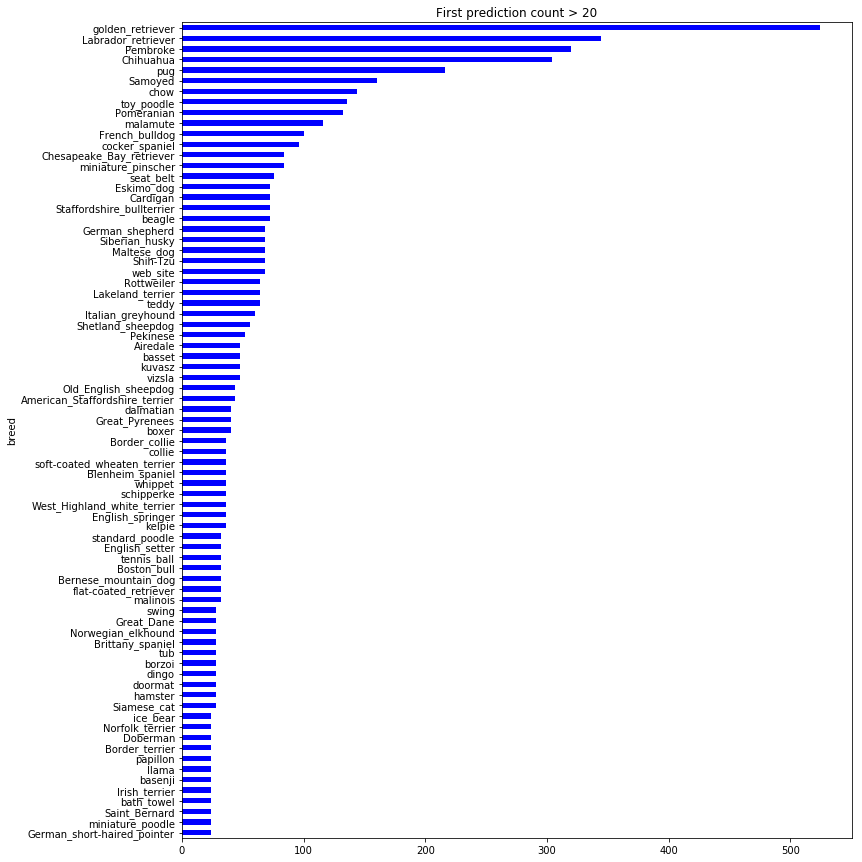

In [21]:
df_p1.query('p1_count > 20')['p1_count'].sort_values(ascending=True).plot(kind='barh', title='First prediction count > 20', color='blue', figsize=(12, 15));

#### Bar chart for the count of each "first" predicted breed which is less than 20
- Below bar chart shows a lot more false predictions. For example, about 15 tweets for a dog rating had a "first" prediction of goose

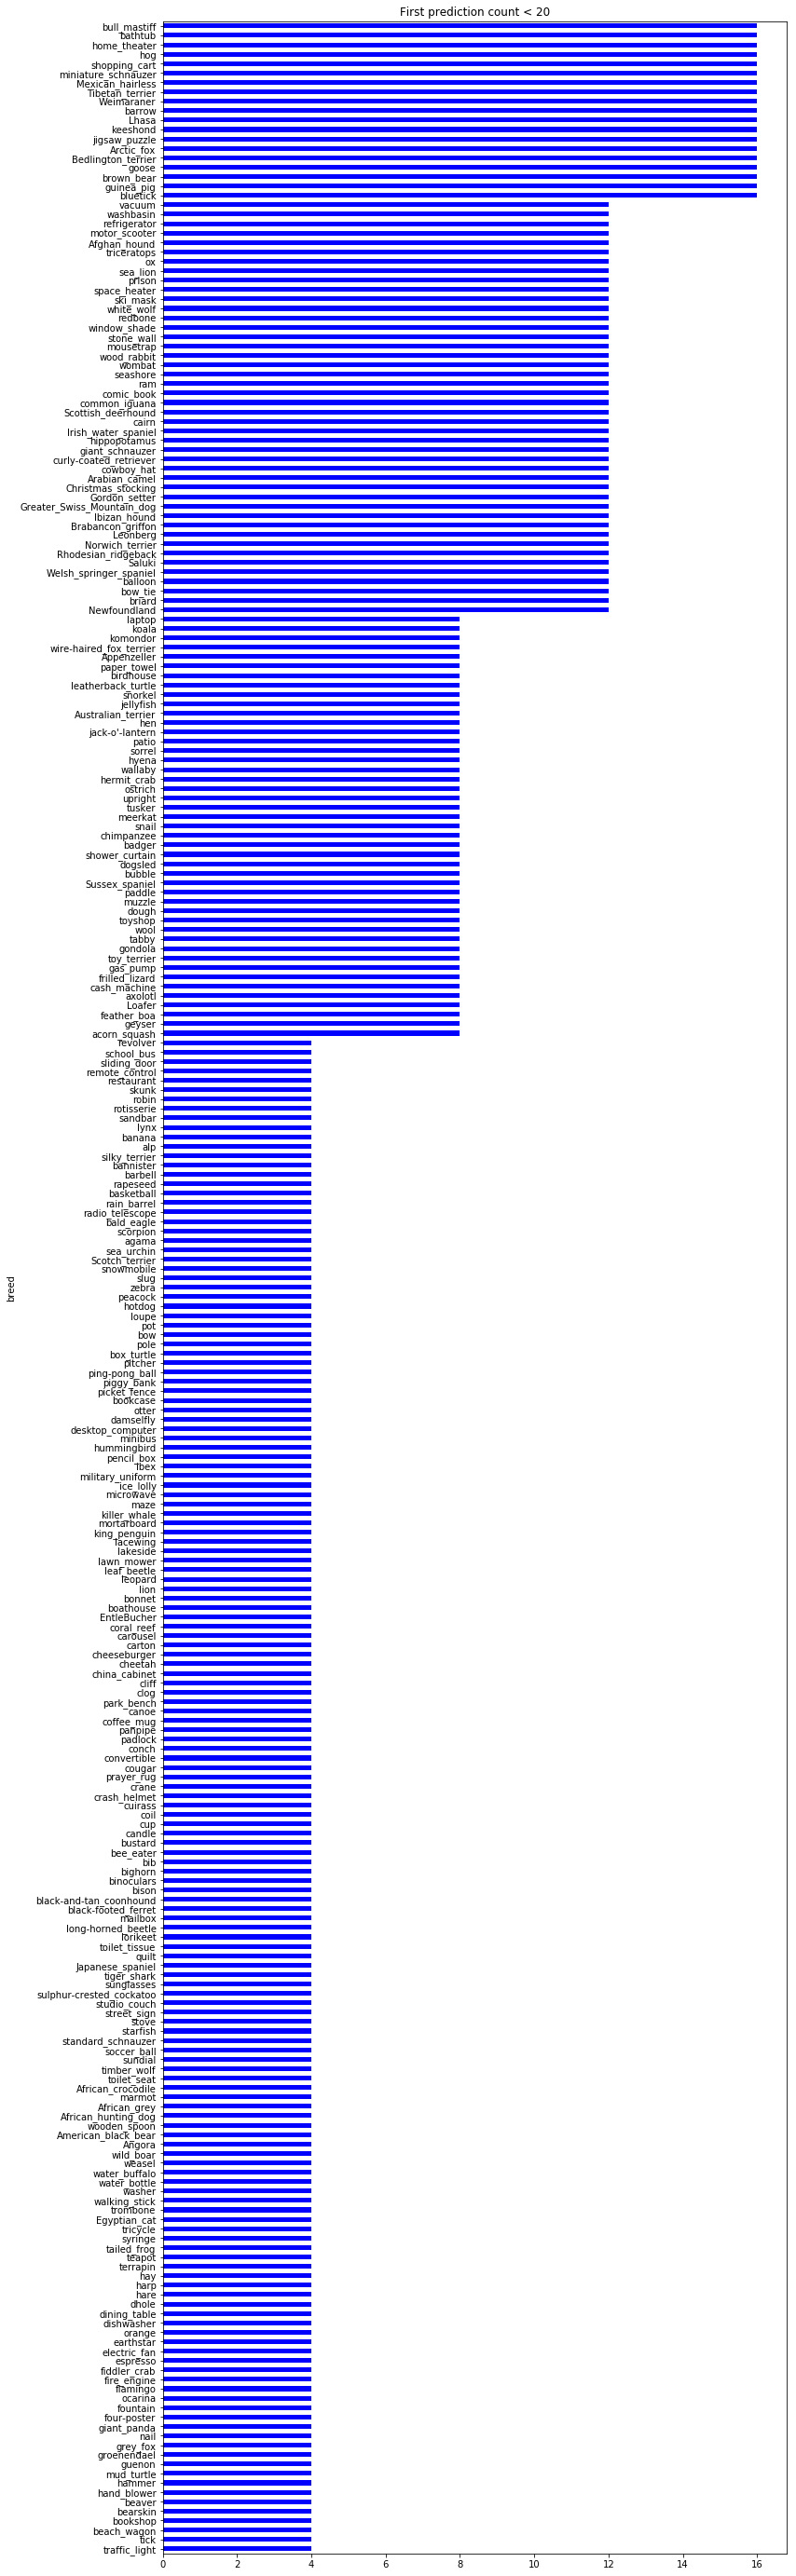

In [22]:
df_p1.query('p1_count < 20')['p1_count'].sort_values(ascending=True).plot(kind='barh', title='First prediction count < 20', color='blue', figsize=(12, 50));

#### Bar chart for the count of each "first" predicted breed, greater than 20 and tweet of dog is from a breeder (is_bred == true)
- Below bar chart does <u><b>not</b></u> display false "first" predictions with the added condition "is bred" equal True. 

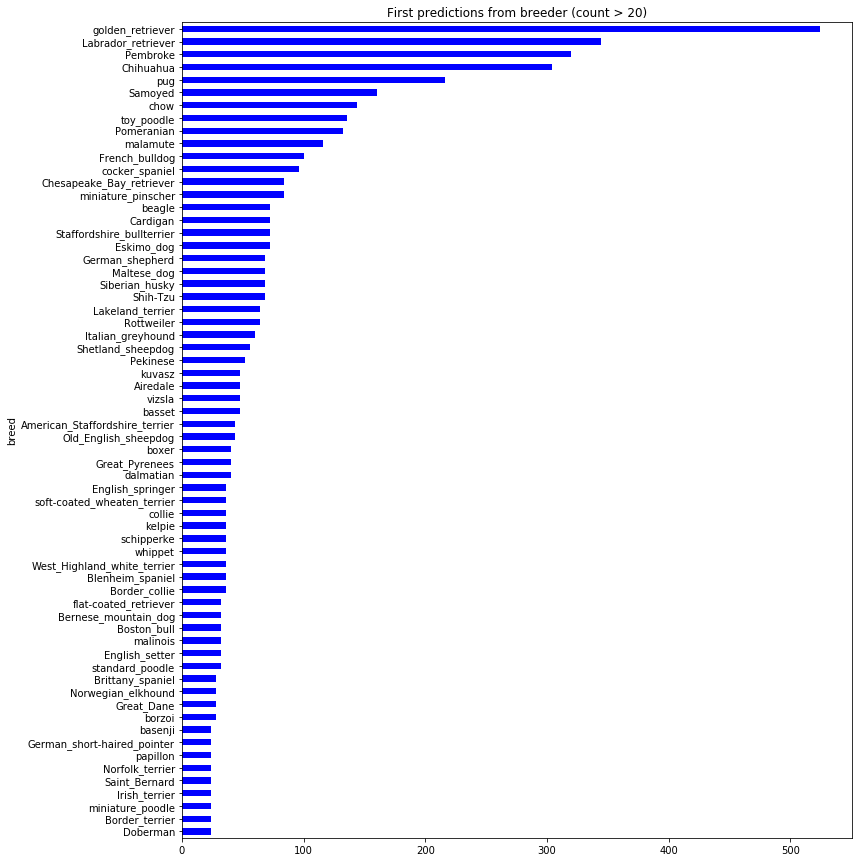

In [24]:
df_p1_is_bred.query('p1_is_bred_count > 20')['p1_is_bred_count'].sort_values(ascending=True).plot(kind='barh', title='First predictions from breeder (count > 20)', color='blue', figsize=(12,15));

#### Bar chart for the count of each "first" predicted breed, less than 20 and tweet of dog is from a breeder (is_bred == true)
- Even with fewer "first" predictions, the below bar chart does <u><b>not</b></u> display false "first" predictions with the added condition "is bred" equal True. 

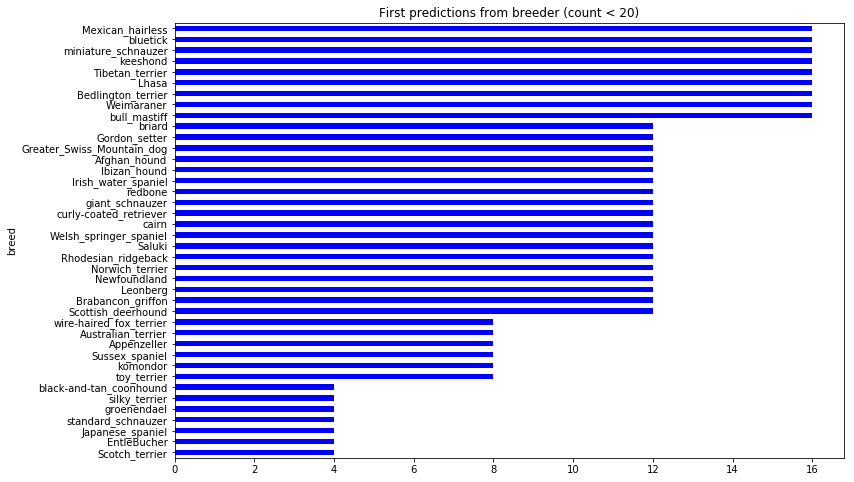

In [25]:
df_p1_is_bred.query('p1_is_bred_count < 20')['p1_is_bred_count'].sort_values(ascending=True).plot(kind='barh', title='First predictions from breeder (count < 20)', color='blue', figsize=(12,8));

### Check if tweet entries of dogs from a breeder (is_bred == True) leads to accurate predictions across all predictions (p1, p2, p3)

##### Bar chart for each predicted breed (first, second, or third), count greater than 20 and tweet of dog is from a breeder (is_bred == true)
- Below bar chart does <u><b>not</b></u> display false breed predictions where "is bred" equal True for <b>all</b> predictions

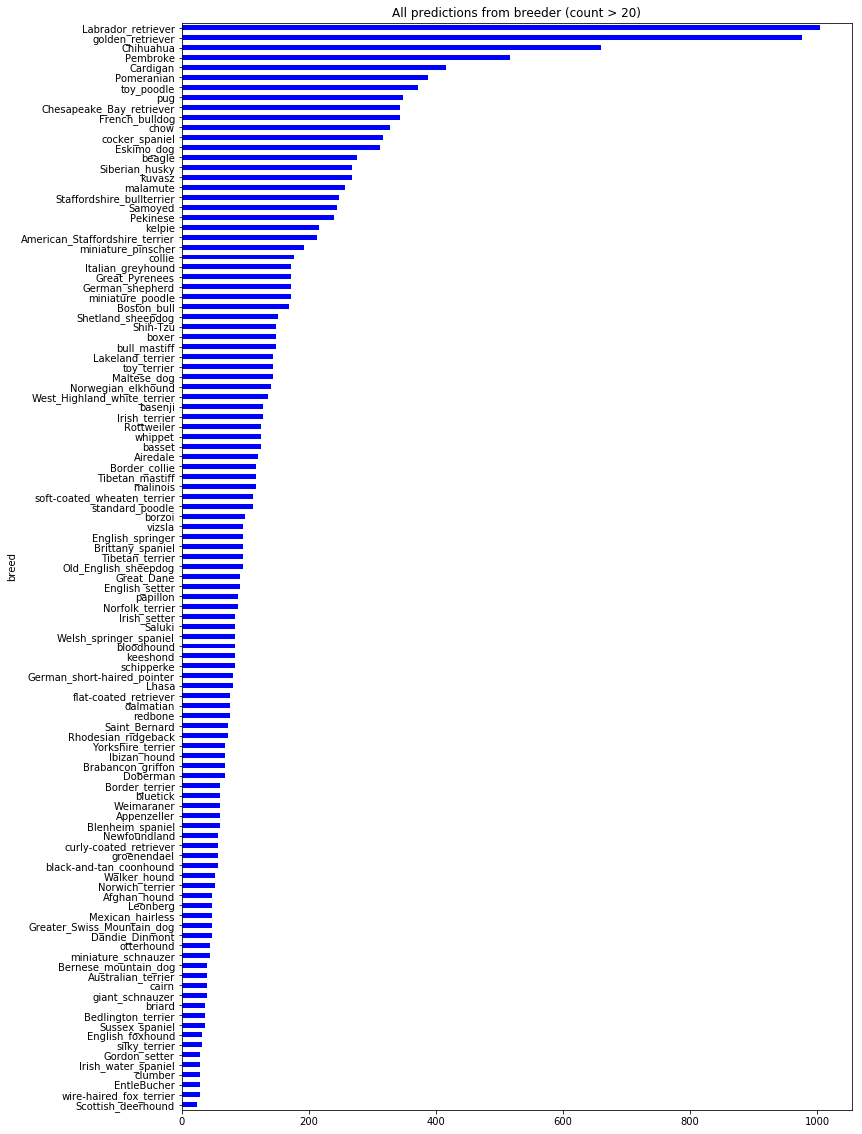

In [26]:
df_is_bred.query('is_bred_count > 20')['is_bred_count'].sort_values(ascending=True).plot(kind='barh', title='All predictions from breeder (count > 20)', color='blue', figsize=(12,20));

##### Bar chart for each predicted breed (first, second, or third), count less than 20 and tweet of dog is from a breeder (is_bred == true)
- Below bar chart does <u><b>not</b></u> display false breed predictions where "is bred" equal True for <b>all</b> predictions

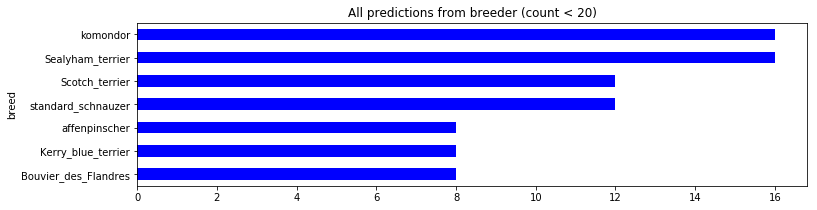

In [27]:
df_is_bred.query('is_bred_count < 20')['is_bred_count'].sort_values(ascending=True).plot(kind='barh', title='All predictions from breeder (count < 20)', color='blue', figsize=(12,3));